In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data_k.csv",
                  encoding ='ISO-8859-1')

In [4]:
data.head(10)

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans
0,0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,russian playing fool funny watch clue totally get,4
1,1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",join founded hall fame legend washington dc â,4
2,2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,great move delay v putin always knew smart,4
3,3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,4
4,4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,economist say trump delivered hope,9
5,5,5,2016-12-28 14:25:11,117710,814114980983427072,False,34542,Twitter for Android,not anymore. The beginning of the end was the ...,anymore beginning end horrible iran deal un st...,4
6,6,6,2016-12-28 14:19:46,106626,814113616110751744,False,30237,Twitter for Android,We cannot continue to let Israel be treated wi...,cannot continue let israel treated total disda...,4
7,7,7,2016-12-28 14:07:13,117900,814110460761018368,False,31799,Twitter for Android,Doing my best to disregard the many inflammato...,best disregard many inflammatory president sta...,4
8,8,8,2016-12-28 03:10:07,78521,813945096269860864,False,19159,Twitter for Android,The U.S. Consumer Confidence Index for Decembe...,u consumer confidence index december surged ne...,4
9,9,9,2016-12-27 21:52:29,99838,813865160163098624,False,23222,Twitter for Android,President Obama campaigned hard (and personall...,president obama campaigned hard personally imp...,4


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [6]:
vader.polarity_scores('cannot continue let total disrespect used friend')

{'compound': 0.1027, 'neg': 0.255, 'neu': 0.455, 'pos': 0.291}

In [7]:
vader.polarity_scores('We cannot continue to let Israel be treated with such total disdain and disrespect. They used to have a great friend in the U.S., but.......')

{'compound': 0.34, 'neg': 0.178, 'neu': 0.602, 'pos': 0.22}

In [8]:
data.iloc[6]

Unnamed: 0                                                        6
Unnamed: 0.1                                                      6
created_at                                      2016-12-28 14:19:46
favorite_count                                               106626
id_str                                           814113616110751744
is_retweet                                                    False
retweet_count                                                 30237
source                                          Twitter for Android
text              We cannot continue to let Israel be treated wi...
text_pp           cannot continue let israel treated total disda...
label_kmeans                                                      4
Name: 6, dtype: object

In [9]:
data.loc[6]["text"]

'We cannot continue to let Israel be treated with such total disdain and disrespect. They used to have a great friend in the U.S., but.......'

In [10]:
data.loc[6]["text_pp"]

'cannot continue let israel treated total disdain disrespect used great friend u'

In [11]:
text = data["text"]

In [12]:
text

0       Russians are playing @CNN and @NBCNews for suc...
1       Join @AmerIcan32, founded by Hall of Fame lege...
2       Great move on delay (by V. Putin) - I always k...
3       My Administration will follow two simple rules...
4       'Economists say Trump delivered hope' https://...
5       not anymore. The beginning of the end was the ...
6       We cannot continue to let Israel be treated wi...
7       Doing my best to disregard the many inflammato...
8       The U.S. Consumer Confidence Index for Decembe...
9       President Obama campaigned hard (and personall...
10      The DJT Foundation, unlike most foundations, n...
11      I gave millions of dollars to DJT Foundation, ...
12      The world was gloomy before I won - there was ...
13      The United Nations has such great potential bu...
14      President Obama said that he thinks he would h...
15      Merry Christmas and a very, very, very , very ...
16                #MerryChristmas https://t.co/5GgDmJrGMS
17      .@FoxN

In [13]:
scores = list()
for i in text:
    scores.append(vader.polarity_scores(i)['compound'])

In [14]:
len(scores)

4218

In [15]:
data['VADER_score'] = scores

In [16]:
data.head()

,Unnamed: 0,Unnamed: 0.1,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_kmeans,VADER_score
0,0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,russian playing fool funny watch clue totally get,4,0.2695
1,1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",join founded hall fame legend washington dc â,4,0.6249
2,2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,great move delay v putin always knew smart,4,0.7257
3,3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,4,0.0000
4,4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,economist say trump delivered hope,9,0.4404


In [17]:
cluster4 = data.loc[data['label_kmeans'] == 4]

In [21]:
cluster4.count()

Unnamed: 0        1871
Unnamed: 0.1      1871
created_at        1871
favorite_count    1871
id_str            1871
is_retweet        1871
retweet_count     1871
source            1871
text              1871
text_pp           1871
label_kmeans      1871
VADER_score       1871
dtype: int64

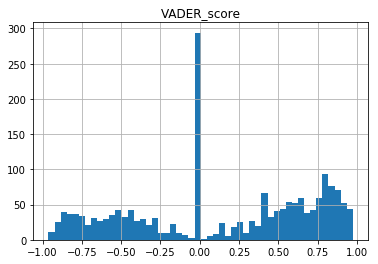

In [23]:
cluster4.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

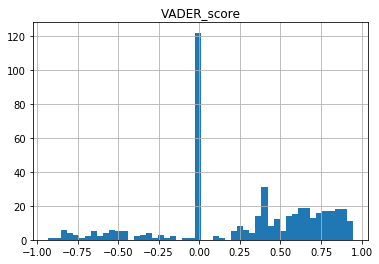

In [24]:
cluster9 = data.loc[data['label_kmeans'] == 9]
cluster9.count()
cluster9.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

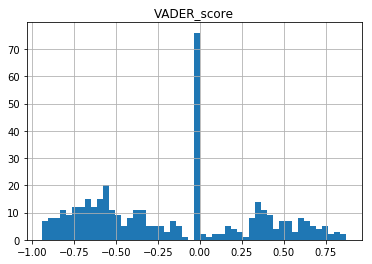

In [25]:
cluster10 = data.loc[data['label_kmeans'] == 10]
cluster10.count()
cluster10.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

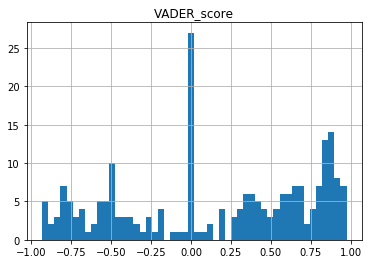

In [26]:
cluster7 = data.loc[data['label_kmeans'] == 7]
cluster7.count()
cluster7.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

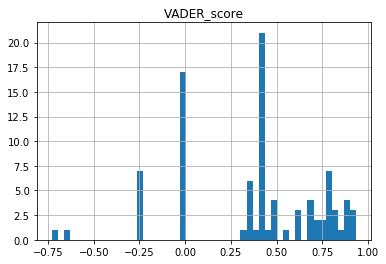

In [27]:
cluster3 = data.loc[data['label_kmeans'] == 3]
cluster3.count()
cluster3.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

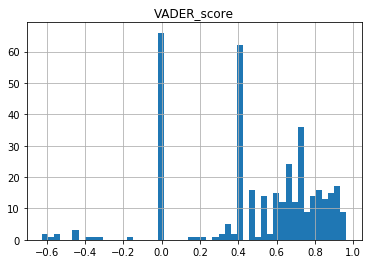

In [28]:
cluster6 = data.loc[data['label_kmeans'] == 6]
cluster6.count()
cluster6.hist('VADER_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()